<a href="https://colab.research.google.com/github/soyab266/test/blob/master/polynominal_(simple_and_multiple)regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.datasets import load_diabetes
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
dtd=DecisionTreeRegressor()
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDRegressor
import random
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.pipeline import Pipeline


In [128]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

# y = 0.8x^2 + 0.9x + 2

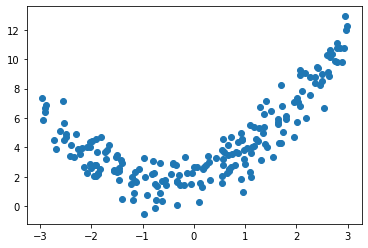

In [129]:
plt.scatter(X,y)

In [130]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=2)

In [42]:
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [43]:
y_pred=lr.predict(X_test)
r2_score(y_test,y_pred)

0.3315410404195457

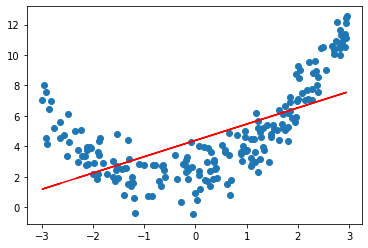

In [44]:
plt.plot(X_train, lr.predict(X_train), color='r')
plt.scatter(X,y)

In [131]:
from numpy.lib import polynomial
poly=PolynomialFeatures(degree=2)
x_train_trans= poly.fit_transform(X_train)
x_test_trans= poly.transform(X_test)

In [132]:
print(X_train[0])
print(x_train_trans[0])

[-2.03184128]
[ 1.         -2.03184128  4.12837897]


In [133]:
lr.fit(x_train_trans,y_train)
y_pred=lr.predict(x_test_trans)
r2_score(y_test, y_pred)

0.734221659145123

In [134]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.92906694 0.79347274]]
[2.08991515]


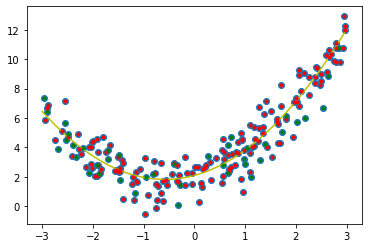

In [135]:
x_new=np.linspace(-3,3,200).reshape(200, 1)
x_new_poly=poly.transform(x_new)
y_new=lr.predict(x_new_poly)

plt.plot(x_new, lr.predict(x_new_poly), color='y')
plt.plot(X_train, y_train, 'r.',label='Training points')
plt.plot(X_test, y_test,'g.',label='testing points')
plt.scatter(X,y)


now by sgd regressor ' gradient descent'

In [136]:
poly=PolynomialFeatures(degree=2)

In [101]:
x_train_trans= poly.fit_transform(X_train)
x_test_trans= poly.transform(X_test)

In [102]:
sgd= SGDRegressor()
sgd.fit(x_train_trans,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor()

In [103]:
y_pred =sgd.predict(x_test_trans)
r2_score(y_test, y_pred)

0.8640874615283164

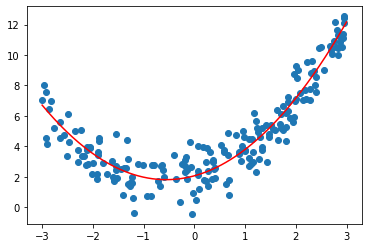

In [106]:
x_new=np.linspace(-3,3, 200).reshape(200,1)
x_new_poly= poly.transform(x_new)
y_new=sgd.predict(x_new_poly)

plt.plot(x_new, y_new, color='r')
plt.scatter(X,y)

now polynomial for multiple i/p known as multiple polynomial regression

In [153]:
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)

In [154]:
X_multi=np.array([x,y]).reshape(100,2)
poly=PolynomialFeatures(degree=3)
X_multi_trans=poly.fit_transform(X_multi)


In [155]:
poly.n_input_features_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning:

The attribute `n_input_features_` was deprecated in version 1.0 and will be removed in 1.2.



2

In [156]:
poly.n_output_features_

10

In [157]:
poly.powers_

array([[0, 0],
       [1, 0],
       [0, 1],
       [2, 0],
       [1, 1],
       [0, 2],
       [3, 0],
       [2, 1],
       [1, 2],
       [0, 3]])

In [158]:
lr.fit(X_multi_trans,z)

LinearRegression()

In [160]:
lr.predict(X_multi_trans).reshape(10,10)


In [162]:
X_test_multi = poly.transform(final)
z_final = lr.predict(X_multi_trans).reshape(10,10)

In [148]:
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)

In [163]:
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final))

fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))

fig.show()